In [1]:
import swarms
import pread as pd
from numpy import linspace, logspace, pi, array
import matplotlib.pyplot as plt
import pandas

In [2]:
df = pandas.read_csv("../GPIMdwarfs.csv", index_col=0)
df.sort_values(by='Distance_distance')

,S_Type,Distance_distance,FLUX_I,FLUX_H,Fe_H_Teff,Class,subtype,Mass,Lum,contrast_thresh
198,M4.0Ve,5.9874,8.263,6.005,3242,M,4,0.20,0.0055,2.000000e-06
252,M2.0Ve,7.0329,7.389,5.605,3640,M,2,0.44,0.0230,7.000000e-07
242,M2V,7.7048,7.066,5.258,3651,M,2,0.44,0.0230,7.000000e-07
552,M1VeBa1,9.7248,6.593,4.831,3742,M,1,0.49,0.0350,3.000000e-07
110,M3Ve+M4Ve,11.1100,8.151,NaN,0,M,3,0.36,0.0150,2.000000e-06
510,M3Ve,11.1359,7.690,5.680,3431,M,3,0.36,0.0150,7.000000e-07
502,M1,14.3787,7.930,6.240,3729,M,1,0.49,0.0350,7.000000e-07
585,M2Ve,14.8604,8.101,6.086,3515,M,2,0.44,0.0230,2.000000e-06
193,M0.0Ve,15.0578,7.777,6.092,3940,M,0,0.60,0.0720,7.000000e-07
109,M3.3V,15.8328,9.100,7.146,3412,M,3,0.36,0.0150,3.000000e-06


In [3]:
"""Access times with data.ages in years
          radii with data.radii in meters
          luminosity with data.lumin in watts
First entry is the root directory.
Second entry is the subdirectory.
Third entry is the filename.
"""
def data_read(mass):
    data = pd.Pread('data', 'Z002', 'pltlum_M'+str(mass)+'Z002.csv') 
    return data

In [16]:
AU = 1.496e11
pc = 3.086e16
Msun = 1.989e30
Lsun = 3.828e26
Mmoon = 7.35e22

RHO=1500 
eta = 0.4; Nstr = 6.; Dt = 100.; Dmax = 150000.; R_pl = 6.9911e7
lamb = 1.65e-6

time = 1.2e7
M_jup = [20, 100, 318, 636]
M0 = 10 * Mmoon

In [17]:
def Fstar(Ls, Bnu, Ts, dpl):
    sig = 5.670367e-8 #Stefan-Boltzmann constant
    part1 = Ls * Bnu
    part2 = 4 * sig * Ts ** 4 * dpl ** 2
    return part1 / part2

In [18]:
def lum_to_temp(L, R):
    sig = 5.670367e-8 #Stefan-Boltzmann constant
    part1 = L / (4 * pi * sig * R**2)
    return (part1)**(1./4.)

In [19]:
star = df.loc[298] # could do for i in range(24): star = Mdwarfs.iloc[i]
star

S_Type                 M0.5
Distance_distance    53.111
FLUX_I                  9.5
FLUX_H                7.504
Fe_H_Teff              3990
Class                     M
subtype                   0
Mass                    0.6
Lum                   0.072
contrast_thresh       3e-06
Name: 298, dtype: object

In [20]:
M_s = star['Mass'] * Msun
L_s = star['Lum'] * Lsun
T_star = star['Fe_H_Teff']
d_pl = star['Distance_distance'] * pc
contrast_thresh = 2e-7#star['contrast_thresh'] # This is the rough contrast threshold I interpolated by eye using the I band magnitude and the GPI contrast ratio figure on their website.

GPIIWA = 0.2 # GPI inner working angle in arcsec
GPIOWA = 1.2 # Outer working angle

# Convert the inner and outer working angles into AU, using the distance to the system
a_plv = linspace(GPIIWA*d_pl/pc * AU, GPIOWA*d_pl/pc * AU, 500)

s = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, 318*5.972e24, a_plv[250], R_pl, eta, Nstr,
                    d_pl, correction=True, alpha=1.2)

s.updateSwarm(time)
print(s.computeAtot())
print(s.swarm.Dmin)

2.3293511972901885e+21
1.6499999999999999e-06


<Figure size 432x288 with 0 Axes>

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


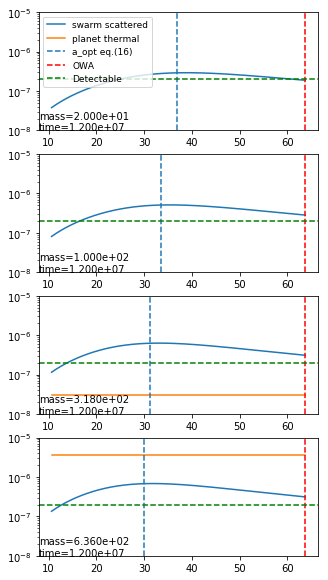

In [21]:
plt.figure(1)
fig, axes = plt.subplots(len(M_jup), subplot_kw=dict(), figsize=(5, 10))
for w in range(len(M_jup)):
    data = data_read(M_jup[w])
    fth_list = []
    fs_list = []
    fth_plt_list = []
    for i in range(len(a_plv)):

        s = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, M_jup[w]*5.972e24, a_plv[i], R_pl, eta, Nstr,
                    d_pl, correction=True, alpha=1.2)

        s.updateSwarm(time)
            
        T_star = s.stellarTemp()
        B_nu_list = s.computeBmu(array([lamb]), T_star)
        F_star = Fstar(L_s, B_nu_list, T_star, d_pl)/1e-26

        f_vrel = 4/pi
        Qd = s.computeQd(s.Dc)
        part1 = (M_s/1.989e30)**0.33 * f_vrel**0.55
        part2 = (M_jup[w])**0.06 * Qd**0.15 * eta
        part3 = time * (M0/5.972e24) / (RHO * (s.Dc/1000)) 

        a_opt = 50 * part1 / part2 * part3**0.24 


        s2 = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, M_jup[w]*5.972e24,
                                a_plv[i], R_pl, eta, Nstr, d_pl,
                                rho=RHO, fQ=5, f_vrel=4/pi,
                                correction=True, alpha=1.2)

        s2.updateSwarm(time)

        # Planet Emissions
        index = data.find_time_index(time)
        if (index > -1):
            T_plt = lum_to_temp(data.lumin[index], data.radii[index])
            B_nu_plt = s2.computeBmu(array([lamb]), T_plt)
            F_plt = Fstar(data.lumin[index], B_nu_plt, T_plt, d_pl)
            fth_plt_list.append(F_plt/1e-26)

        # Swarm Emissions
        F_th = s2.computeFth(array([lamb]), swarm=True)
        F_s = s2.computeFs(array([lamb]), 0.32, 0.08, swarm=True)

        fth_list.append(F_th[0]/1e-26)
        fs_list.append(F_s[0]/1e-26)

    contrast_ratio_apl_th = array(fth_list) / F_star
    contrast_ratio_apl_s = array(fs_list) / F_star
    contrast_ratio_apl_plt_th = array(fth_plt_list) / F_star

    axes[w].plot(a_plv/1.496e11, contrast_ratio_apl_s, label="swarm scattered")
    axes[w].plot(a_plv/1.496e11, contrast_ratio_apl_plt_th, label="planet thermal")
    axes[w].axvline(a_opt, ls='--',label="a_opt eq.(16)")
    axes[w].axvline(a_plv[-1]/AU, color='r', ls='--',label="OWA")
    axes[w].axhline(contrast_thresh, color='g', ls='--',label="Detectable")
    axes[w].text(0, 0, 'mass={0:.3e}'.format(M_jup[w])+'\n'+'time={0:.3e}'.format(time), transform=axes[w].transAxes) 
    if w == 0:
        axes[w].legend(prop={'size': 9})
        #axes[w, k].xlabel("a_pl [au]")
        #axes[w, k].ylabel("F_swarm / F_star")
    axes[w].set_ylim([1.e-8, 1.e-5])
    axes[w].set_yscale('log')
plt.show()